# Lab 05 - Bài tập

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [23]:
import numpy as np
import scipy.stats as sc
#a
def lam_bai_trac_nghiem(so_cau_hoi, so_phuong_an_dung=1):
    dap_an_dung = np.ones(so_cau_hoi)  # Mảng chứa đáp án đúng (1 là đúng, 0 là sai)
    dap_an_chon = np.random.randint(0, so_phuong_an_dung + 1, size=so_cau_hoi)  # Mảng chứa đáp án chọn ngẫu nhiên
    so_cau_dung = np.sum(dap_an_chon == dap_an_dung) # Đếm số câu đúng trong đáp án đã chọn so với đáp án đúng
    return so_cau_dung


for i in range(10):
    so_cau_dung = lam_bai_trac_nghiem(10)
    print(f"Lần làm bài thứ {i+1}: {so_cau_dung} câu đúng")

Lần làm bài thứ 1: 6 câu đúng
Lần làm bài thứ 2: 9 câu đúng
Lần làm bài thứ 3: 4 câu đúng
Lần làm bài thứ 4: 3 câu đúng
Lần làm bài thứ 5: 4 câu đúng
Lần làm bài thứ 6: 7 câu đúng
Lần làm bài thứ 7: 4 câu đúng
Lần làm bài thứ 8: 7 câu đúng
Lần làm bài thứ 9: 2 câu đúng
Lần làm bài thứ 10: 4 câu đúng


In [24]:
#b
# Tính xác suất trả lời đúng 4 câu (để được 4 điểm)
k = 4
p = 0.25
probability_4_correct = sc.binom.pmf(k, 10, p)
print(f'Xác suất để sinh viên được 4 điểm: {probability_4_correct:.4f}')

Xác suất để sinh viên được 4 điểm: 0.1460


In [27]:
#c
# Tính kỳ vọng E(X)
expected_value = sc.binom.mean(10, p)
print(f'Kỳ vọng E(X) = {expected_value}')

# Tính phương sai Var(X)
variance_value = sc.binom.var(10, p)
print(f'Phương sai Var(X) = {variance_value}')


Kỳ vọng E(X) = 2.5
Phương sai Var(X) = 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [32]:
import numpy as np
import scipy.stats as sc

# 1p -> 3 cuộc điện thoại gọi
lambda_rate = 3

# Tính xác suất cho 1, 2, và 3 cuộc gọi
prob_1_call = sc.poisson.pmf(1, lambda_rate)  
prob_2_call = sc.poisson.pmf(2, lambda_rate)  
prob_3_call = sc.poisson.pmf(3, lambda_rate)  

print(f'Xác suất nhận 1 cuộc gọi: {prob_1_call:.4f}')
print(f'Xác suất nhận 2 cuộc gọi: {prob_2_call:.4f}')
print(f'Xác suất nhận 3 cuộc gọi: {prob_3_call:.4f}')

Xác suất nhận 1 cuộc gọi: 0.1494
Xác suất nhận 2 cuộc gọi: 0.2240
Xác suất nhận 3 cuộc gọi: 0.2240


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [39]:
from scipy.stats import norm
import matplotlib.pyplot as plt
mu = 500  
sigma = 4  

# Loại 1: trên 505 gam
z_1 = (505 - mu) / sigma
prob_type_1 = 1 - norm.cdf(z_1)  # P(X > 505)

# Loại 2: từ 495 đến 505 gam
z_2_lower = (495 - mu) / sigma
z_2_upper = (505 - mu) / sigma
prob_type_2 = norm.cdf(z_2_upper) - norm.cdf(z_2_lower)  # P(495 < X < 505)

# Loại 3: dưới 495 gam
z_3 = (495 - mu) / sigma
prob_type_3 = norm.cdf(z_3)  # P(X < 495)

print(f"Tỷ lệ Loại 1 (trên 505 gam): {prob_type_1:.4f}")
print(f"Tỷ lệ Loại 2 (từ 495 đến 505 gam): {prob_type_2:.4f}")
print(f"Tỷ lệ Loại 3 (dưới 495 gam): {prob_type_3:.4f}")


Tỷ lệ Loại 1 (trên 505 gam): 0.1056
Tỷ lệ Loại 2 (từ 495 đến 505 gam): 0.7887
Tỷ lệ Loại 3 (dưới 495 gam): 0.1056


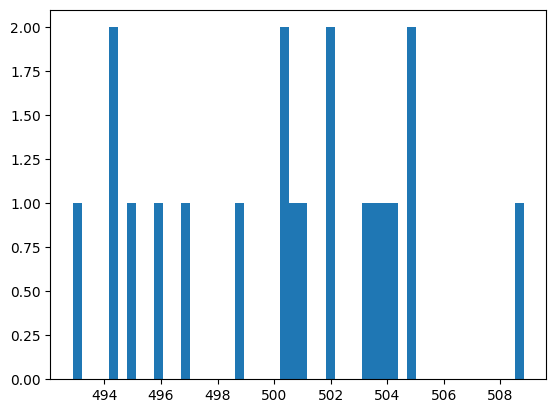

In [46]:
norm_20_simulate = norm.rvs(mu, sigma, 20)
plt.hist(norm_20_simulate, bins=50)
plt.show()

In [48]:
norm_20_simulate

array([502.10620148, 494.18100706, 504.10260269, 508.82878795,
       494.9857341 , 503.92988462, 492.8874302 , 503.16311708,
       501.05063722, 498.74472791, 495.94451278, 501.92010195,
       504.79552792, 494.43868666, 500.41016566, 500.67228407,
       504.82059757, 503.54027728, 496.71956143, 500.42275224])

In [53]:
sample_mean = np.mean(norm_20_simulate)
sample_std = np.std(norm_20_simulate, ddof=1)  # ddof=1 để tính độ lệch chuẩn mẫu
print(f'Giá trị trung bình từ mẫu: {sample_mean:.2f} gam')
print(f'Độ lệch chuẩn từ mẫu: {sample_std:.2f} gam')

Giá trị trung bình từ mẫu: 500.38 gam
Độ lệch chuẩn từ mẫu: 4.32 gam


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

---